In [2]:
fichier_json = open('modele/modele.json', 'r')
modele_json = fichier_json.read()
fichier_json.close()

In [ ]:
from keras.models import model_from_json

modele = model_from_json(modele_json)
modele.load_weights("modele/modele.weights.h5")

In [6]:
#Définition des catégories de classifications
classes = ["Un T-shirt/haut",
           "Un pantalon",
           "Un pull", 
           "Une robe",
           "Un manteau",
           "Des sandales",
           "Une chemise",
           "Des baskets", 
           "Un sac",
           "Des bottes de cheville"]

In [15]:
import numpy as np
from PIL import Image, ImageFilter


def load_and_preprocess_image(image_path, target_size=28, content_size=20):
    """
    Load an image, convert to grayscale, and preprocess for model input.
    
    Args:
        image_path: Path to the input image
        target_size: Size of the output square image (default: 28x28)
        content_size: Size of the resized content within the target (default: 20)
    
    Returns:
        numpy.ndarray: Preprocessed image array ready for model prediction
    """
    image = Image.open(image_path).convert('L')
    resized_img = resize_with_aspect_ratio(image, content_size)
    canvas = create_centered_image(resized_img, target_size)
    normalized_array = normalize_pixels(canvas)
    
    return normalized_array.reshape(1, target_size, target_size, 1)


def resize_with_aspect_ratio(image, target_dimension):
    """
    Resize image maintaining aspect ratio.
    
    Args:
        image: PIL Image object
        target_dimension: Target size for the longest dimension
    
    Returns:
        PIL Image: Resized and sharpened image
    """
    width, height = image.size
    
    if width > height:
        new_width = target_dimension
        new_height = max(1, round(target_dimension * height / width))
    else:
        new_height = target_dimension
        new_width = max(1, round(target_dimension * width / height))
    
    return image.resize((new_width, new_height), Image.LANCZOS).filter(ImageFilter.SHARPEN)


def create_centered_image(image, canvas_size):
    """
    Place image in the center of a white canvas.
    
    Args:
        image: PIL Image to center
        canvas_size: Size of the square canvas
    
    Returns:
        PIL Image: Image centered on white canvas
    """
    canvas = Image.new('L', (canvas_size, canvas_size), 255)
    
    img_width, img_height = image.size
    
    # Calculate centering offsets
    x_offset = (canvas_size - img_width) // 2
    y_offset = (canvas_size - img_height) // 2
    
    canvas.paste(image, (x_offset, y_offset))
    return canvas


def normalize_pixels(image):
    pixels = np.array(image.getdata(), dtype=np.float32)
    # Invert colors (white background to black) and normalize
    return (255 - pixels) / 255.0


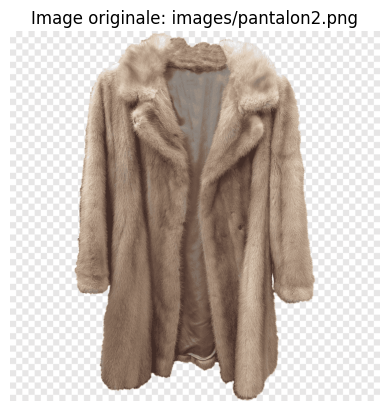

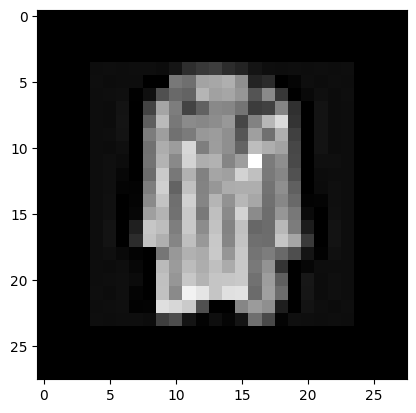

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Selon moi l'image est : Un manteau

Un T-shirt/haut: 9.62%
Un pantalon: 0.18%
Un pull: 7.64%
Une robe: 1.47%
Un manteau: 65.89%
Des sandales: 0.01%
Une chemise: 10.85%
Des baskets: 0.10%
Un sac: 4.20%
Des bottes de cheville: 0.04%


In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28
chemin = "images/manteau.png"

# Affichage de l'image originale
original_img = Image.open(chemin)
plt.imshow(original_img)
plt.title("Image originale: "+chemin)
plt.axis("off")
plt.show()

# Affichage de l'image traitée
premiereImage = image_array
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage, cmap='gray')
plt.show()

image_array = load_and_preprocess_image(chemin)
probabilities = modele.predict(image_array)[0]
predicted_class = np.argmax(probabilities)

print(f"Selon moi l'image est : {classes[predicted_class]}\n")

for i, class_name in enumerate(classes):
    print(f"{class_name}: {probabilities[i] * 100:.2f}%")